# Assignment on Capstone Project - The Battle of Neighborhoods (Week 2)

## Table of contents

* [1. Introduction: Business Problem](#introduction)
* [2. Data](#data)
* [3. Methodology & Analysis](#methodology&analysis)
* [4. Result](#result)
* [5. Discussion](#discussion)
* [6. Conclusion](#conclusion)

## 1. Introduction: Business Problem <a name="introduction"></a>

**1.1 Scenario and Background**

Just after a visit to Dhaka, the capital of Bangladesh, a Chinese couple has decided to enter into a partnership agreement with a renowned Chinese Restaurant owner in Dhaka City to introduce authentic Chinese food side by side with its regular dishes. During their stay, they observed that Chinese food is very popular with the city dwellers and in any occasion particularly for family gathering, people used to hang out in Chinese restaurant to have the local made dishes. But the Chinese couple found the dishes that are being prepared in such restaurants are not the authentic dishes and tastes are miles apart from the original Chinese flavor. 
Therefore, they are trying to find out a renowned Chinese restaurant in a suitable location/neighborhood of Dhaka city to make their pilot project a formal start.
Through this assignment, I will be providing a solution to Chinese couple to find the location/neighborhood and the name of a restaurant with relevant data and explanation.

**1.2 Problem to be resolved**

The challenge to resolve is being able to find a Chinese restaurant in Dhaka that is located in a densely populated neighborhood and well reputed.
I will be finding the location and the restaurant subject to the following conditions:
•	The location/neighborhood populated with maximum number of people compared to other locations in Dhaka city.
•	Restaurants located nearby any residential complex in that neighborhood. Residential complex has been selected considering the usual or occasional inflow of customers to those restaurants.  
•	A restaurant with overall good customers’ ratings that to be considered for partnership agreement. 

**1.3 Interested Audience**

I believe this project will be a fairly good exercise for interested investors to capture a **preliminary scenario** that will play a key role for planning an investment in international market.  

## 2. Data <a name="data"></a>

**2.1 A description of the data and its sources** 

Based on the above definition of our problem, tasks that will be followed are;

•	Capture data that indicates the highest populated neighborhood in Dhaka city, 
•	Find a residential complex in that neighborhood,
•	A good rated Chinese restaurant located nearby that residential complex.

To find the highest populated neighborhood in Dhaka city, I have search in Google and found a link (https://www.citypopulation.de/php/bangladesh-admin.php?adm1id=26) that provides the info about Dhaka city population according to last Census carried out in 2011, and in addition, also found a link in Wikipedia (https://en.wikipedia.org/wiki/Mohammadpur_Thana) that cited a residential complex (largest apartment blocks) located in that highest populated neighborhood in city. It is to be mentioned here that I could not capture the data in csv file directly from the mentioned websites as the format of the web data was not transferable. Therefore, from that information I have to create applicable data in excel file on my own. 
Name and rating of restaurants that are located nearby the residential complex will be obtained by using **Foursquare API**

**2.2 How data will be used to solve the problem**

Google data will provide the detail information about the population of Dhaka city, from where I will create excel file with applicable data. From excel file, a data frame will be created in IBM Watson notebook and showed the population in table format. As like saying ‘A picture is worth a thousand words’, a horizontal bar graph will be created to indentify the name of highest populated neighborhood of Dhaka city.  From Wiki page, the name of a residential complex will be collected which will later use in **Foursquare** to pinpoint the names of closest Chinese restaurants and finally select one restaurant based on customer ratings.    

## 3. Methodology & Analysis <a name="methodology&analysis"></a>

At the beginning, my first step is to start collecting information from website (https://www.citypopulation.de/php/bangladesh-admin.php?adm1id=26) that consists 40 neighborhood-wise population of Dhaka City from last census done in 2011.  The information provided in that website was not okay to download data directly therefore I have prepared the applicable data in a separate excel file (Census Data_Population of Dhaka City) and uploaded it is Watson notebook from local drive. The excel file then read through the notebook and created a data frame in a table format. The table shows area wise population list in highest to lowest order from which a horizontal bar chart is created in notebook using visualization tool. After indentifying the name of highest populated neighborhood from that list, I searched separately the name of residential complex in that location. As side attempt, the name of largest residential complex has been found from this wiki link (https://en.wikipedia.org/wiki/Mohammadpur_Thana).  
In my second step of analysis, it will be pinpointing the '**location of residential complex**' in highest populated neighborhood using **Foursquare API**. After getting the coordinate from Foursquare API, I will limit my searching within 3 km radius to find the name of Chinese restaurant in that vicinity.  
In third and final step, I will be focusing on the restaurants in that neighborhood in terms of close proximity of the residential complex. From the generated restaurant list, I will try to check the service ratings after one by one starting from the closest. As I set my condition earlier that the closest with maximum good rating restaurant will be considered as the final one, therefore few attempts need to be taken to identify the best option.

**Importing Excel file from local drive for analysis**

In [51]:
# The code was removed by Watson Studio for sharing.

,Area,District,2011
0,Mohammadpur,City District (Thana),559832
1,Pallabi,City District (Thana),536835
2,Badda,City District (Thana),536621
3,Mirpur,City District (Thana),500373
4,Jatrabari,City District (Thana),443601
5,Kafrul,City District (Thana),396182
6,Sabujbagh,City District (Thana),376421
7,Kadamtali,City District (Thana),370895
8,Lalbagh,City District (Thana),369933
9,Khilgaon,City District (Thana),327717


From the above table, name of top five populated neighborhood names have been taken to make a bar chart for better understanding.

In [52]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

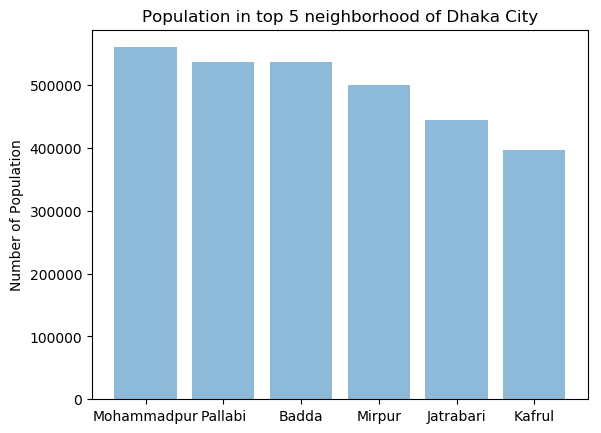

In [53]:
objects = ('Mohammadpur', 'Pallabi', 'Badda', 'Mirpur', 'Jatrabari','Kafrul')
y_pos = np.arange(len(objects))
performance = [559832,536835,536621,500373,443601,396182]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Population')
plt.title('Population in top 5 neighborhood of Dhaka City')

plt.show()

From above bar chart, the most populated neighborhood's name has identified as **Mohammadpur**. Now I have searched the wiki page (https://en.wikipedia.org/wiki/Mohammadpur_Thana) to know residential complex located at this neighborhood and found that a complex named **Japan Garden City** is the largest complex in that neighborhood.

**Now importing necessary Libraries for analysis** 

In [54]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


Now defining Foursquare Credentials and Version, and converting the Japan Garden City's address to its latitude and longitude coordinates.

In [ ]:
# The code was removed by Watson Studio for sharing.

In [56]:
address = 'japan garden city, building # 12, ring road, dhaka, dhaka division, bangladesh'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

23.7641944 90.3585130434465


So, let's define a query to search for **Chinese Restaurant** that is within **1000 metres** from the **Japan Garden City** residential complex. 

In [57]:
search_query = 'chinese restaurant'
radius = 1000
print(search_query + ' .... OK!')

chinese restaurant .... OK!


Define the corresponding URL

In [58]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=VIX425QELP0NA0ZAKIWI05MD1ZTTZESLBXVT3ZTVX4F54NOK&client_secret=XAGV2VA2D3S2XXLBSOFL2XTXZI00NFPWSYVGONY55BLNY0Y1&ll=23.7641944,90.3585130434465&v=20190101&query=chinese restaurant&radius=1000&limit=30'

Send the GET Request and examine the results

In [59]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5df003a77828ae001b88a43b'},
 'response': {'venues': [{'id': '52ff6178498ed7e21bc0b325',
    'name': 'City Park Chinese And Thai Restaurant',
    'location': {'address': 'Ring Road',
     'crossStreet': 'Tajmahal Road',
     'lat': 23.764624,
     'lng': 90.358822,
     'labeledLatLngs': [{'label': 'display',
       'lat': 23.764624,
       'lng': 90.358822}],
     'distance': 57,
     'cc': 'BD',
     'city': 'Dhaka',
     'state': 'Mohammadpur',
     'country': 'বাংলাদেশ',
     'formattedAddress': ['Ring Road (Tajmahal Road)', 'Dhaka', 'বাংলাদেশ']},
    'categories': [{'id': '4bf58dd8d48988d1c4941735',
      'name': 'Restaurant',
      'pluralName': 'Restaurants',
      'shortName': 'Restaurant',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1576010677',
    'hasPerk': False},
   {'id': '57bc6d0a498e09958285e000',
    'name': 'H King Palace Ch

Get relevant part of JSON and transform it into a *pandas* dataframe

In [60]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,52ff6178498ed7e21bc0b325,Ring Road,BD,Dhaka,বাংলাদেশ,Tajmahal Road,57,"[Ring Road (Tajmahal Road), Dhaka, বাংলাদেশ]","[{'label': 'display', 'lat': 23.764624, 'lng':...",23.764624,90.358822,NaN,Mohammadpur,City Park Chinese And Thai Restaurant,v-1576010677
1,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,57bc6d0a498e09958285e000,NaN,BD,NaN,বাংলাদেশ,NaN,736,[বাংলাদেশ],"[{'label': 'display', 'lat': 23.770767, 'lng':...",23.770767,90.359344,NaN,NaN,H King Palace Chinese & Thai Restaurant,v-1576010677
2,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4f620d80e4b07f728ff5b3cb,Mohammadpur,BD,NaN,বাংলাদেশ,NaN,88,"[Mohammadpur, বাংলাদেশ]","[{'label': 'display', 'lat': 23.76498080775191...",23.764981,90.358620,NaN,NaN,City Park Restaurant,v-1576010677
3,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",False,524ff548498e5a82139e1651,Ring Road,BD,Dhaka,বাংলাদেশ,NaN,264,"[Ring Road, Dhaka - 1207, বাংলাদেশ]","[{'label': 'display', 'lat': 23.76655510119266...",23.766555,90.358845,1207,Shamoly,Ruchita Restaurant,v-1576010677
4,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",False,4f198a59e4b00ed353efaf1c,Ring Road,BD,ঢাকা,বাংলাদেশ,NaN,512,"[Ring Road, ঢাকা, বাংলাদেশ]","[{'label': 'display', 'lat': 23.76684391975592...",23.766844,90.354402,NaN,ঢাকা,Lobster Restaurant,v-1576010677


Now define information of interest and filter dataframe

In [61]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,City Park Chinese And Thai Restaurant,Restaurant,Ring Road,BD,Dhaka,বাংলাদেশ,Tajmahal Road,57,"[Ring Road (Tajmahal Road), Dhaka, বাংলাদেশ]","[{'label': 'display', 'lat': 23.764624, 'lng':...",23.764624,90.358822,NaN,Mohammadpur,52ff6178498ed7e21bc0b325
1,H King Palace Chinese & Thai Restaurant,Restaurant,NaN,BD,NaN,বাংলাদেশ,NaN,736,[বাংলাদেশ],"[{'label': 'display', 'lat': 23.770767, 'lng':...",23.770767,90.359344,NaN,NaN,57bc6d0a498e09958285e000
2,City Park Restaurant,Chinese Restaurant,Mohammadpur,BD,NaN,বাংলাদেশ,NaN,88,"[Mohammadpur, বাংলাদেশ]","[{'label': 'display', 'lat': 23.76498080775191...",23.764981,90.358620,NaN,NaN,4f620d80e4b07f728ff5b3cb
3,Ruchita Restaurant,Asian Restaurant,Ring Road,BD,Dhaka,বাংলাদেশ,NaN,264,"[Ring Road, Dhaka - 1207, বাংলাদেশ]","[{'label': 'display', 'lat': 23.76655510119266...",23.766555,90.358845,1207,Shamoly,524ff548498e5a82139e1651
4,Lobster Restaurant,Asian Restaurant,Ring Road,BD,ঢাকা,বাংলাদেশ,NaN,512,"[Ring Road, ঢাকা, বাংলাদেশ]","[{'label': 'display', 'lat': 23.76684391975592...",23.766844,90.354402,NaN,ঢাকা,4f198a59e4b00ed353efaf1c
5,mohammadi restaurant,Restaurant,NaN,BD,NaN,বাংলাদেশ,NaN,279,[বাংলাদেশ],"[{'label': 'display', 'lat': 23.76182046867022...",23.761820,90.359392,NaN,NaN,50bebd0de4b0c1b61c4790fc
6,Chayanir Kabab & Restaurant,BBQ Joint,NaN,BD,NaN,বাংলাদেশ,NaN,834,[বাংলাদেশ],"[{'label': 'display', 'lat': 23.7571, 'lng': 9...",23.757100,90.361150,NaN,NaN,57164a18cd10c4902ae1c807
7,Sultan Lounge & Restaurant,Indian Chinese Restaurant,B 19,BD,ঢাকা,বাংলাদেশ,Ring Road,690,"[B 19 (Ring Road), ঢাকা, বাংলাদেশ]","[{'label': 'display', 'lat': 23.770385, 'lng':...",23.770385,90.358873,NaN,ঢাকা,58b9821b809a773377853e1e
8,Al-Mahbub Restaurant,Restaurant,Ring Road,BD,ঢাকা,বাংলাদেশ,NaN,778,"[Ring Road, ঢাকা - 1207, বাংলাদেশ]","[{'label': 'display', 'lat': 23.77063367287523...",23.770634,90.361488,1207,ঢাকা,4f75be89e4b0eeae72b5ff22
9,Al-Amin Hotel & Restaurant,Restaurant,NaN,BD,NaN,বাংলাদেশ,NaN,925,[বাংলাদেশ],"[{'label': 'display', 'lat': 23.76231895144909...",23.762319,90.367363,NaN,NaN,4fdc91d1e4b018d0789e57b0


 Let's visualize the Chinese restaurants that are nearby

In [62]:
dataframe_filtered.name

0       City Park Chinese And Thai Restaurant
1     H King Palace Chinese & Thai Restaurant
2                        City Park Restaurant
3                          Ruchita Restaurant
4                          Lobster Restaurant
5                        mohammadi restaurant
6                 Chayanir Kabab & Restaurant
7                  Sultan Lounge & Restaurant
8                        Al-Mahbub Restaurant
9                  Al-Amin Hotel & Restaurant
10                          Prince Restaurant
11                     W Fine Dine Restaurant
12                           Anita Restaurant
Name: name, dtype: object

In [63]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Japan Garden City
folium.features.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='red',
    popup='japan garden city, building # 12, ring road, dhaka, dhaka division, bangladesh',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Chinese Restaurant as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

After getting the Map, now get the venue's overall rating taking the closest restaurant **City Park Chinese And Thai Restaurant**. 

In [64]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [65]:
venue_id = '52ff6178498ed7e21bc0b325' # ID of City Park Chinese And Thai Restaurant
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


We found that the closest venue has no rating, so lets check the second venue **H King Palace Chinese & Thai Restaurant**. 

In [66]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [67]:
venue_id = '57bc6d0a498e09958285e000' # ID of H King Palace Chinese & Thai Restaurant.
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


The second venue has no rating, so lets check the third venue **City Park Restaurant**

In [68]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [69]:
venue_id = '4f620d80e4b07f728ff5b3cb' # ID of City Park Restaurant
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


After three attempts we found that the three closest restaurants have no service ratings therefore we assume the rest of the restaurants will have the same condition and will not have other features like Tips, Users Friends and users profile image. 

## 4. Result <a name="result"></a>
The analysis shows that there are 12 Chinese restaurants in **1000 metres** radius of the largest residential complex **‘Japan Garden City’**. When selecting the right restaurant for partnership agreement, we unfortunately found the first three restaurants have no ratings. In such situation, we assumed that the rest of the restaurants will also have the same condition. This is actually a very challenging situation to make any decision.  
Under this scenario, I would recommend my client to move ahead with the current findings and take initiative to establish direct communication with the closest Chinese restaurant named ‘City Park Chinese and Thai Restaurant’. 
After having a discussion about this partnership proposal, if it is mutually beneficial for both parties, my client may kick-start their pilot project.  

## 5. Discussion <a name="discusion"></a>
Through this assignment, it has been revealed that most of the venues, particularly the restaurants in Dhaka city are not serious about their online presence which are usually integrated with location finding and information system. In digital age, it is absolutely essential for any business to have an online presence. Even if any company does not conduct business online (good examples are the restaurants here); customers and potential customers are expecting to see that company online. Poor presence can lead to losing out on the opportunity to increase customer base and the future business prospect as well. 
Partnering with restaurant of our first choice can be a win-win situation for my client if they highlighted this issue as improvement area for restaurant owner and take advantage of their weak point at the time of negotiation.   

## 6. Conclusion <a name="conclusion"></a>
In this assignment, I have indentified the appropriate location and choice of a Chinese restaurant in Dhaka city for my Chinese client to make a partnership agreement with that restaurant as my client wish to introduce authentic Chinese food in international market. Due to poor online presence of all the nearby restaurants in the highest populated neighborhood in Dhaka city, the comparison among the restaurants were not possible practically; therefore, recommendation has been made to start correspondence with the first nearby restaurant located from the largest residential complex. There are some improvements areas at restaurant side in which my Chinese client can initiate for them in order get better business deal.     